<a href="https://colab.research.google.com/github/Wander03/lab-1-phase-2-Wander03/blob/main/DATA_301_Lab_1B_Andrew_Kerr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explore the In Class Survey

During the first class, you filled out the [first-day survey](https://docs.google.com/forms/d/e/1FAIpQLSczqKwzkye0RP8byLMxzj1Br3kC_YUdVGLWmMXX6VND99ivWg/viewform). In this lab, you will explore [the responses](https://docs.google.com/spreadsheets/d/1K9rfAscLESbwvovOc1aD3K6PFgdqkVRbaFHeD-UMTSc/edit?usp=sharing).

Download the spreadsheet from the link above, then read the data into a `pandas` `DataFrame` whose columns are the survey questions. Each row represents one student's response to the questions.

In [ ]:
import pandas as pd

## Question 1

Make a graphic that visualizes the favorite colors of students in DATA 301. Explain what you see.

(_Hint:_ You might have to clean the data a bit first.)

In [ ]:
from google.colab import files
uploaded = files.upload()
import io

Saving Data 301 Class Survey Responses.csv to Data 301 Class Survey Responses.csv


In [ ]:
df_survey = pd.read_csv(io.BytesIO(uploaded["Data 301 Class Survey Responses.csv"]))
df_survey["What is your favorite color?"].value_counts()

Blue               10
blue                7
Green               6
Red                 4
purple              3
Purple              3
green               3
Pink                2
red                 2
pink                1
Gray                1
grey                1
black               1
Teal                1
navy blue           1
Blue and Black      1
Blue/Indigo         1
Forest Green        1
turquoise           1
Magenta             1
light pink          1
Light Blue          1
Royal Blue          1
Black               1
Orange and Blue     1
Navy                1
dark green          1
Name: What is your favorite color?, dtype: int64

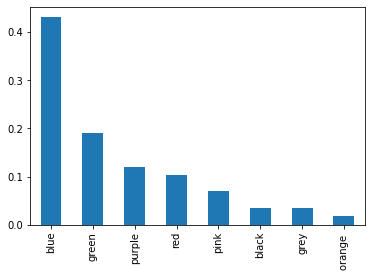

In [ ]:
def color(c):
  c = c.lower()

  # If they gave multiple, take the first color given
  if "and" in c:
    index = c.index("and")
    c = c[:index]

  if ("blue" in c ) or ("navy" in c) or ("turquoise" in c) or ("teal" in c):
    return "blue"
  elif "green" in c:
    return "green"
  elif "pink" in c:
    return "pink"
  elif ("purple" in c) or ("magenta" in c):
    return "purple"
  elif ("gray" in c) or ("grey" in c):
    return "grey"
  else:
    return c

df_survey["favorite color"] = df_survey["What is your favorite color?"].map(color)
color_counts = df_survey["favorite color"].value_counts(normalize=True)
color_counts.plot.bar()

From the graph, I can see that roughly 45% of students have Blue, or a shade of Blue, as there favorite color with the runner up being Green at 20%. In other words, a majoirty of this Data 301 classes students favor the color Blue.

## Question 2

Is there a relationship between the number of siblings a student has, and whether or not they live in SLO?

Make a visualization to address this question, and discuss the result.

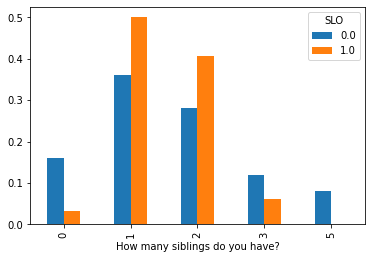

In [ ]:
df_survey["Where are you living this quarter?"].value_counts()
df_survey["SLO"] = df_survey["Where are you living this quarter?"].map({
    "Off Campus, but in SLO" : 1,
    "Off Campus, outside of SLO" : 0,
    "On-Campus housing" : 1
})

joint_living_siblings = pd.crosstab(df_survey["SLO"], df_survey["How many siblings do you have?"], normalize=True)
living = joint_living_siblings.sum(axis=1)
siblings_given_living = joint_living_siblings.divide(living, axis=0)
siblings_given_living.T.plot.bar()

Based on my visualization, if you do not live at SLO you are more likely to have either 0, 3, or 5 siblings. Meanwhile if you do live at SLO, you are most likely to have 1 or 2 siblilings. This could be because living at SLO would be more expensive than living at home, so those with few siblings can better afford to live at SLO. Those without siblings do not have siblings as a reason to move to SLO, thus tend to stay home. However with 3 or more siblings the family may save money by not sending there Cal Poly student to SLO, thus they stay at home.  

## Question 3

You were asked to guess how many golf balls fit into a standard-sized school bus.  This is actually a famous Google interview question!  The best answer I could find online is [here](https://www.quora.com/How-many-golf-balls-can-fit-into-a-school-bus).

How did the different subgroups in the class do on this question?  That is, can you find an interesting relationship between the golf ball numbers guess and any of the other variables in this dataset?

(_Hint:_ There are many reasonable approaches to this problem. You will get full credit for any reasonable approach, as long as you carefully justify it.)

In [ ]:
df_survey2 = df_survey.copy()
df_survey2.columns = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']  # Could not call the Suppose you wanted to... column
pd.set_option('display.float_format', '{:.10g}'.format) # Format to a float rather than scientific notation
df_survey["Do you consider yourself artistic?"].value_counts()

No     35
Yes    23
Name: Do you consider yourself artistic?, dtype: int64

In [ ]:
df_survey2["6"].describe()

count            58
mean    968469.8831
std     2648201.816
min            2500
25%           12750
50%          250000
75%     666273.1665
max        17000000
Name: 6, dtype: float64

In [ ]:
def range(n):
  if n <= 250000:
    return "Above"
  else:
    return "Below"

df_survey2["12"] = df_survey2["6"].map(range)

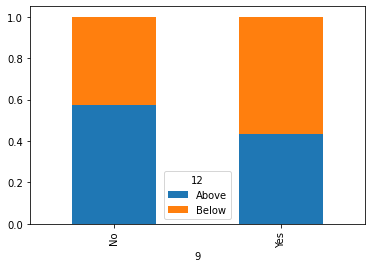

In [ ]:
joint_golf_art = pd.crosstab(df_survey2["12"], df_survey2["9"], normalize=True)
art = joint_golf_art.sum(axis=0)
golf_given_art = joint_golf_art.divide(art, axis=1)
golf_given_art.T.plot.bar(stacked=True)

I sorted the number of golf ball estiamtes into "Above" for above the mean and "Below" for below the mean. Doing so, I split the class almost in half with 30 Above's and 28 Below's. I wanted to know: If you consider yourself artistic, are you more likely to guess a higher or lower than the median guess of the class. That is, are artistic students guessing larger numbers or smaller numbers?

Based on my bar graph, if you consider yourself artistic you are more likely to guess a smaller amount of golf balls. This may be because you can better visualize the problem, or possibly because you feel less comfortable guessing larger numbers. 

## Question 4

Is there a relationship between number of siblings and whether or not you enjoy video games?

Make a visualization and discusse the results.

In [ ]:
df_survey["Do you enjoy video games?"].value_counts()

Yes    45
No     13
Name: Do you enjoy video games?, dtype: int64

In [ ]:
df_survey["How many siblings do you have?"].value_counts()

1    25
2    20
3     6
0     5
5     2
Name: How many siblings do you have?, dtype: int64

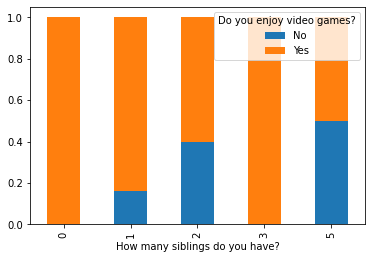

In [ ]:
joint_games_siblings = pd.crosstab(df_survey["Do you enjoy video games?"], df_survey["How many siblings do you have?"], normalize=True)
siblings = joint_games_siblings.sum(axis=0)
games_given_siblings = joint_games_siblings.divide(siblings, axis=1)
games_given_siblings.T.plot.bar(stacked=True)

This graph represents the proportion of students who, given X siblings, like or dislike video games. Based on the graph, we can see that most students overall like video games, with some of those who have 2, 3, or 5 siblings disliking video games. This could be because having at least 1 sibling gives you someone else to play with in person, rather than playing video games. If we had a larger sample size, we might expect that people with more siblings tend to dislike video games more. At this point we cannot make this claim since the sample size for 3, 4, and 5 siblings are small or nonexistant in this data set.